In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
df = pd.read_csv('cc.csv')

In [3]:
from sklearn.cluster import KMeans

# X1에 'Age' , 'Spending Score (1-100)'의 값을 넣어줍니다.  
X1 = df[['area1' , 'area2', 'area3']].values

# 데이터 정규화(standardscaler)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(X1)

# inertia 라는 빈 리스트를 만들어줍니다. 
inertia = []

# 군집수 n을 1에서 11까지 돌아가며 X1에 대해 k-means++ 알고리즘을 적용하여 inertia를 리스트에 저장합니다. 
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    algorithm.fit(normalized_data)
    inertia.append(algorithm.inertia_)

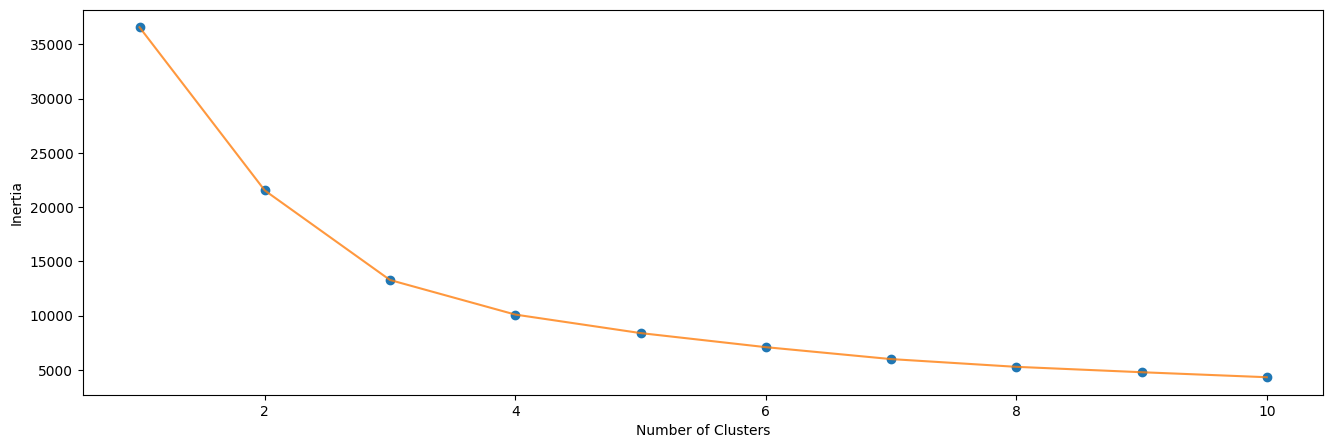

In [4]:
plt.figure(1 , figsize = (16 ,5)) # 사이즈 지정
plt.plot(np.arange(1 , 11) , inertia , 'o') #11개의 inertia 값 점으로 찍어주기
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.8) # 11개의 inertia값 선으로 연결하기
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [9]:
from sklearn.cluster import KMeans

# X1에 'Age' , 'Spending Score (1-100)'의 값을 넣어줍니다.  
X1 = df[['area1' , 'area2', 'area3']].values

# 데이터 정규화(minmaxscaler)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X1)

# inertia 라는 빈 리스트를 만들어줍니다. 
inertia = []

# 군집수 n을 1에서 11까지 돌아가며 X1에 대해 k-means++ 알고리즘을 적용하여 inertia를 리스트에 저장합니다. 
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    algorithm.fit(normalized_data)
    inertia.append(algorithm.inertia_)

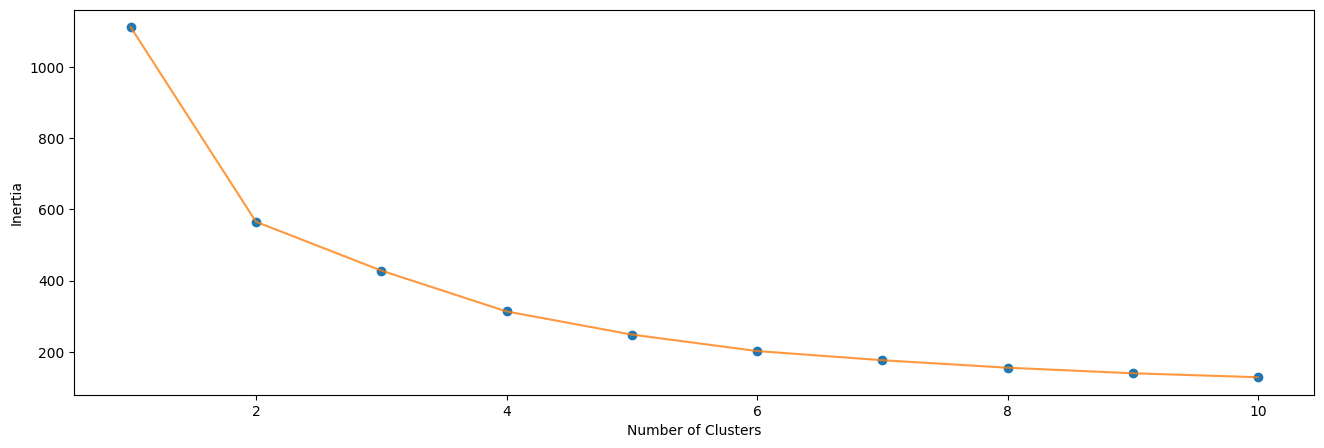

In [10]:
plt.figure(1 , figsize = (16 ,5)) # 사이즈 지정
plt.plot(np.arange(1 , 11) , inertia , 'o') #11개의 inertia 값 점으로 찍어주기
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.8) # 11개의 inertia값 선으로 연결하기
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [11]:
normalized_data

array([[0.51091815, 0.7047    , 0.        ],
       [0.47477972, 0.7054    , 0.        ],
       [0.62137658, 0.565     , 0.        ],
       ...,
       [0.51538756, 0.5384    , 0.        ],
       [0.29779083, 0.7918    , 0.        ],
       [0.60732984, 0.2892    , 0.        ]])

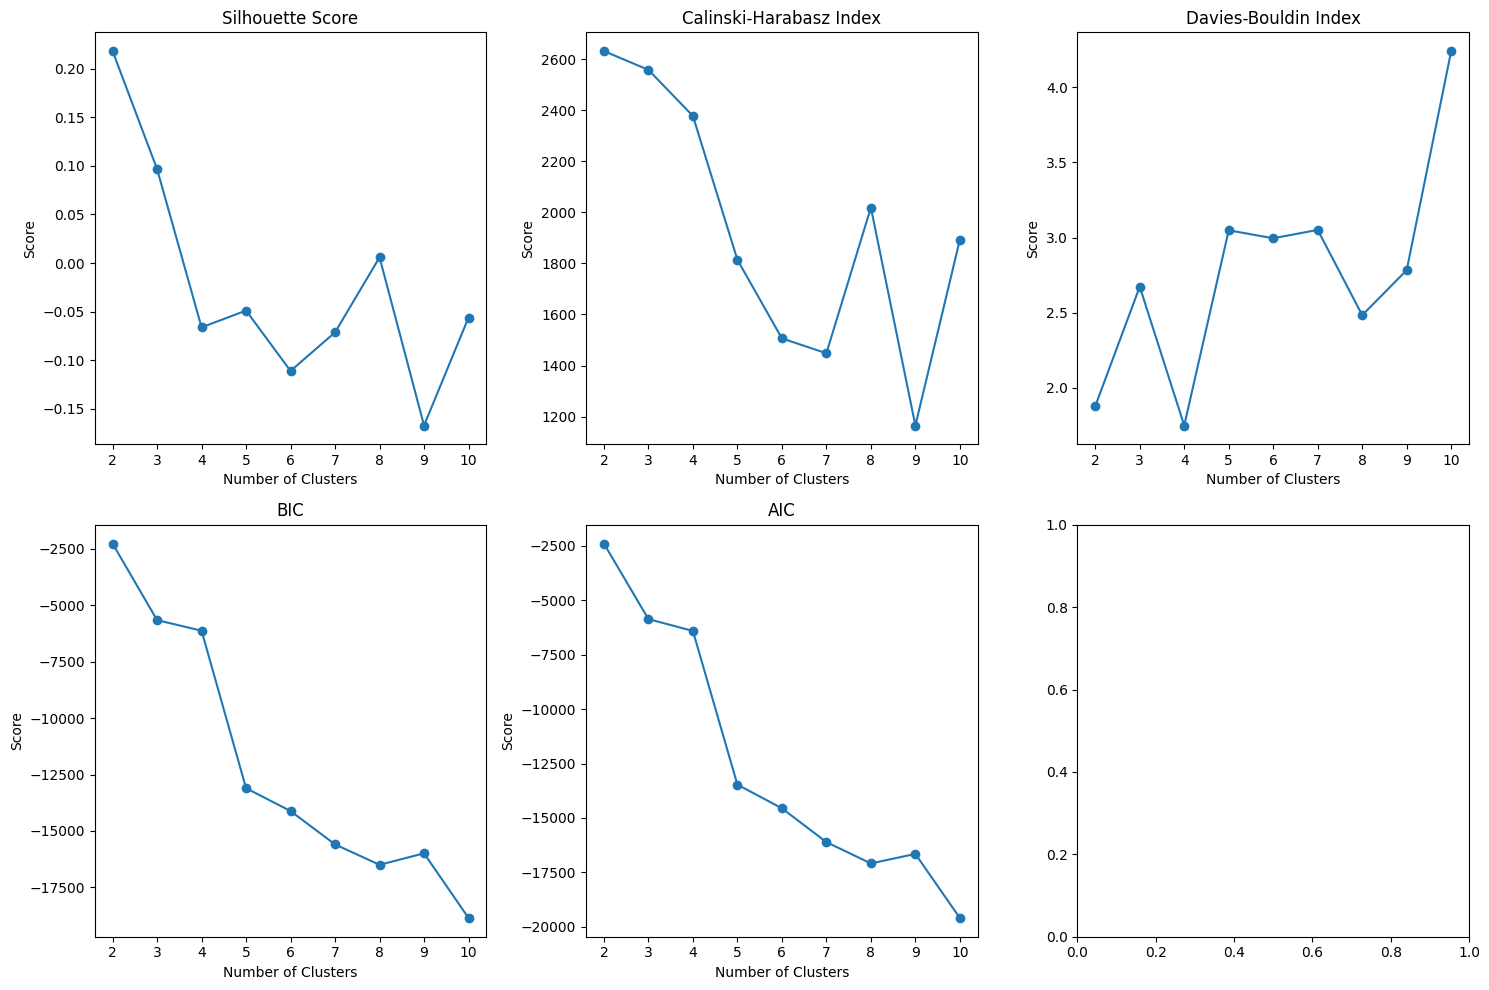

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn import metrics

# 예제 데이터 생성
data, true_labels = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)
data = StandardScaler().fit_transform(data)

# GMM 모델 적용 및 평가
min_clusters, max_clusters = 2, 10
eval_metrics = {
    'Silhouette Score': [],
    'Calinski-Harabasz Index': [],
    'Davies-Bouldin Index': [],
    'BIC': [],
    'AIC': []
}

for n_clusters in range(min_clusters, max_clusters + 1):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(normalized_data)
    labels = gmm.predict(normalized_data)
    
    # Silhouette Score
    silhouette = silhouette_score(normalized_data, labels)
    eval_metrics['Silhouette Score'].append(silhouette)
    
    # Calinski-Harabasz Index
    calinski = calinski_harabasz_score(normalized_data, labels)
    eval_metrics['Calinski-Harabasz Index'].append(calinski)
    
    # Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(normalized_data, labels)
    eval_metrics['Davies-Bouldin Index'].append(davies_bouldin)
    
    # BIC
    bic = gmm.bic(normalized_data)
    eval_metrics['BIC'].append(bic)
    
    # AIC
    aic = gmm.aic(normalized_data)
    eval_metrics['AIC'].append(aic)

# 시각화
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, (metric_name, metric_values) in enumerate(eval_metrics.items()):
    row = i // 3
    col = i % 3
    axs[row, col].plot(range(min_clusters, max_clusters + 1), metric_values, marker='o')
    axs[row, col].set_title(metric_name)
    axs[row, col].set_xlabel('Number of Clusters')
    axs[row, col].set_ylabel('Score')

plt.tight_layout()
plt.show()


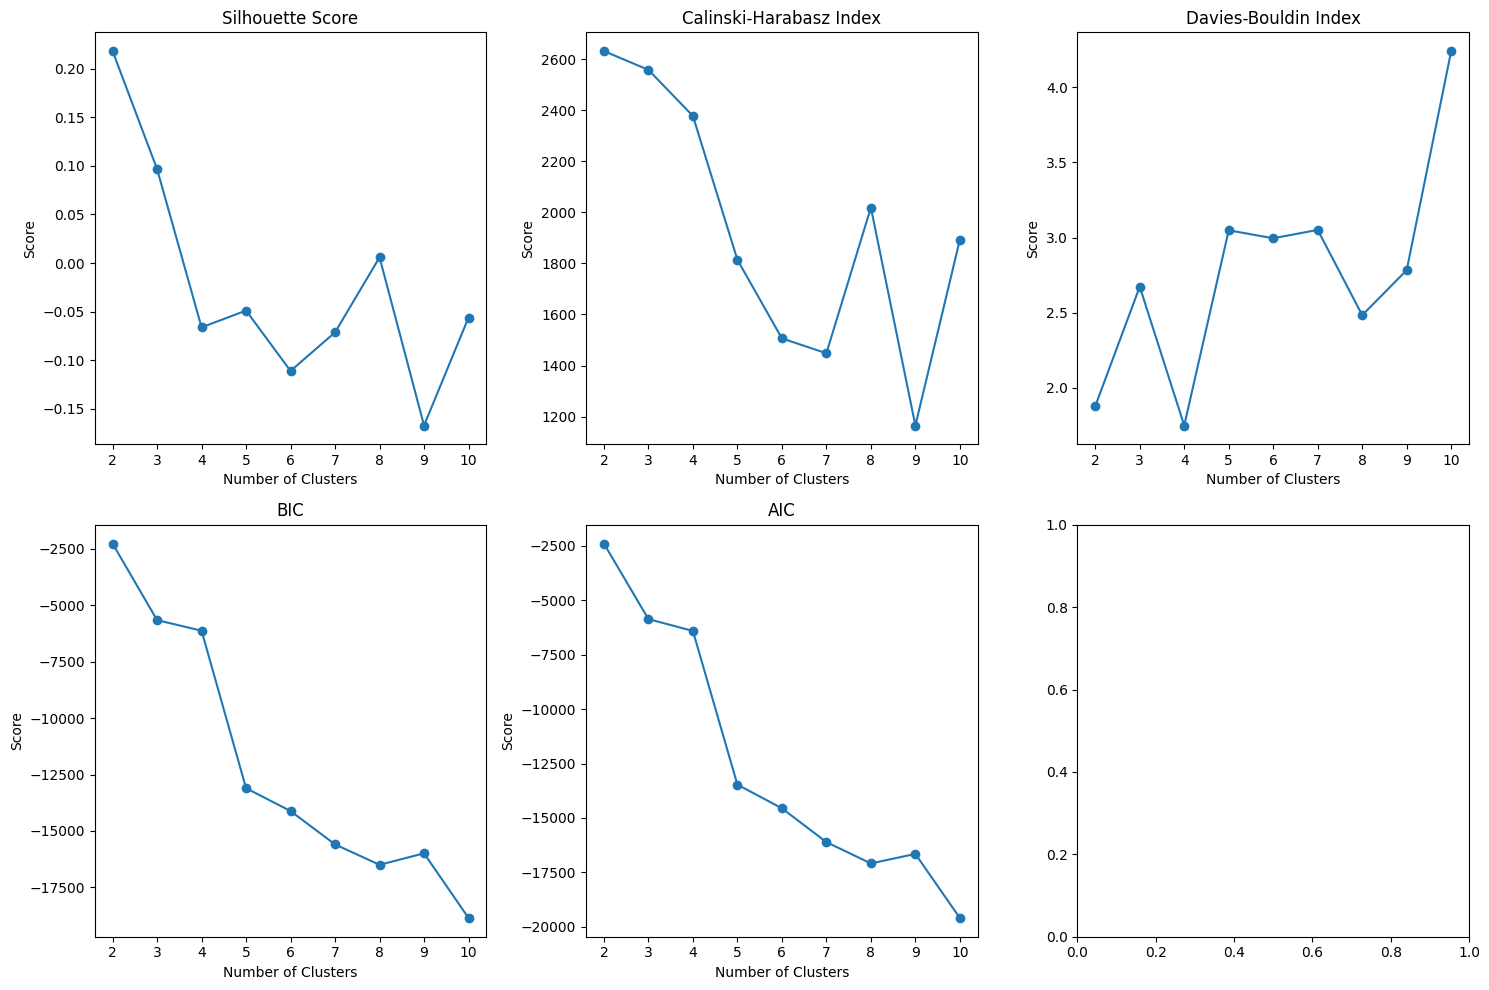

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn import metrics

# 예제 데이터 생성
data = StandardScaler().fit_transform(X1)

# GMM 모델 적용 및 평가
min_clusters, max_clusters = 2, 10
eval_metrics = {
    'Silhouette Score': [],
    'Calinski-Harabasz Index': [],
    'Davies-Bouldin Index': [],
    'BIC': [],
    'AIC': []
}

for n_clusters in range(min_clusters, max_clusters + 1):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(data)
    labels = gmm.predict(data)
    
    # Silhouette Score
    silhouette = silhouette_score(data, labels)
    eval_metrics['Silhouette Score'].append(silhouette)
    
    # Calinski-Harabasz Index
    calinski = calinski_harabasz_score(data, labels)
    eval_metrics['Calinski-Harabasz Index'].append(calinski)
    
    # Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(data, labels)
    eval_metrics['Davies-Bouldin Index'].append(davies_bouldin)
    
    # BIC
    bic = gmm.bic(data)
    eval_metrics['BIC'].append(bic)
    
    # AIC
    aic = gmm.aic(data)
    eval_metrics['AIC'].append(aic)

# 시각화
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, (metric_name, metric_values) in enumerate(eval_metrics.items()):
    row = i // 3
    col = i % 3
    axs[row, col].plot(range(min_clusters, max_clusters + 1), metric_values, marker='o')
    axs[row, col].set_title(metric_name)
    axs[row, col].set_xlabel('Number of Clusters')
    axs[row, col].set_ylabel('Score')

plt.tight_layout()
plt.show()


In [15]:
data

array([[ 1.01354682,  0.65532738, -0.41678903],
       [ 0.81475543,  0.65868532, -0.41678903],
       [ 1.62116007, -0.01482218, -0.41678903],
       ...,
       [ 1.03813233, -0.14242403, -0.41678903],
       [-0.15883066,  1.07315148, -0.41678903],
       [ 1.54389133, -1.33785188, -0.41678903]])

In [9]:
n_clusters = 4
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(data)
labels = gmm.predict(data)

In [10]:
pd.Series(labels).value_counts().sort_values(ascending=False)

3    8111
0    1768
2    1560
1     753
dtype: int64

In [11]:
df['gmm_label'] = labels
df

,v_link_id,time,area1,area2,area3,gmm_label
0,47873728002,00:00:00,40.94,70.47,0.00,3
1,47877889701,00:00:00,38.11,70.54,0.00,3
2,47877362801,00:00:00,49.59,56.50,0.00,3
3,47873728001,00:00:00,49.55,7.12,0.00,3
4,47871275102,00:00:00,48.43,16.21,0.09,1
...,...,...,...,...,...,...
12187,47874204801,23:45:00,48.18,19.53,0.00,3
12188,47871346002,23:45:00,33.87,58.82,0.00,3
12189,47876086401,23:45:00,41.29,53.84,0.00,3
12190,47872101401,23:45:00,24.25,79.18,0.00,3


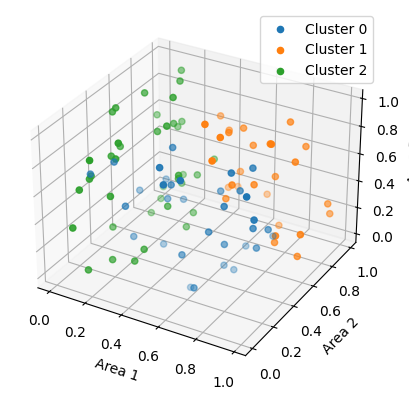

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# 예제 데이터 생성 (이 부분을 실제 데이터에 맞게 수정)
np.random.seed(42)
data = pd.DataFrame({
    'area1': np.random.rand(100),
    'area2': np.random.rand(100),
    'area3': np.random.rand(100),
    'label': np.random.choice([0, 1, 2], size=100)  # 가상의 레이블 데이터, 실제 데이터에 맞게 수정
})

# 데이터 정규화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['area1', 'area2', 'area3']])

# GMM 모델 적용
gmm = GaussianMixture(n_components=3, random_state=42)
data['label'] = gmm.fit_predict(scaled_data)

# 3차원 산점도 그리기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 각 군집에 대한 데이터를 추출하여 산점도 그리기
for label in data['label'].unique():
    cluster_data = data[data['label'] == label]
    ax.scatter(cluster_data['area1'], cluster_data['area2'], cluster_data['area3'], label=f'Cluster {label}')

# 축 레이블 설정
ax.set_xlabel('Area 1')
ax.set_ylabel('Area 2')
ax.set_zlabel('Area 3')

# 범례 추가
ax.legend()

plt.show()


In [34]:
# pip install plotly
!pip install --upgrade nbformat


     ---------------------------------------- 77.6/77.6 kB 2.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import plotly.express as px
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# 예제 데이터 생성 (이 부분을 실제 데이터에 맞게 수정)
np.random.seed(42)
data = pd.DataFrame({
    'area1': df.area1,
    'area2': df.area2,
    'area3': df.area3,
    'label': df.gmm_label  # 가상의 레이블 데이터, 실제 데이터에 맞게 수정
})

# 데이터 정규화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['area1', 'area2', 'area3']])

# GMM 모델 적용
gmm = GaussianMixture(n_components=3, random_state=42)
data['label'] = gmm.fit_predict(scaled_data)

# 3D 산점도 그리기
fig = px.scatter_3d(data, x='area1', y='area2', z='area3', color='label',
                    title='3D Scatter Plot with GMM Clusters', labels={'label': 'Cluster'}, size_max=1)
fig.show()


In [21]:
import plotly.graph_objects as go
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# 예제 데이터 생성 (이 부분을 실제 데이터에 맞게 수정)
np.random.seed(42)
data = pd.DataFrame({
    'area1': df.area1,
    'area2': df.area2,
    'area3': df.area3,
    'label': df.gmm_label  # 가상의 레이블 데이터, 실제 데이터에 맞게 수정
})

# 데이터 정규화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['area1', 'area2', 'area3']])

# GMM 모델 적용
gmm = GaussianMixture(n_components=4, random_state=42)
data['label'] = gmm.fit_predict(scaled_data)

# 3D 산점도 그리기 (점 크기 조절)
fig = go.Figure()

for label in data['label'].unique():
    cluster_data = data[data['label'] == label]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['area1'],
        y=cluster_data['area2'],
        z=cluster_data['area3'],
        mode='markers',
        marker=dict(size=5, opacity=0.8),
        name=f'Cluster {label}'
    ))

fig.update_layout(scene=dict(xaxis_title='Area 1', yaxis_title='Area 2', zaxis_title='Area 3'))
fig.show()


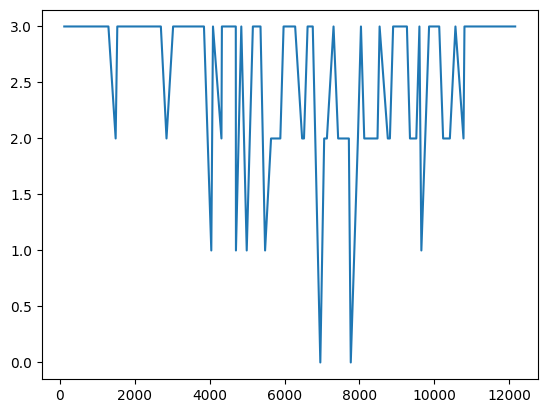

In [23]:
plt.plot(df[df['v_link_id']==47870854202].gmm_label)

In [24]:
df[df['v_link_id']==47870854202]

,v_link_id,time,area1,area2,area3,gmm_label
118,47870854202,00:00:00,23.50,80.90,0.0,3
129,47870854202,00:15:00,22.97,82.26,0.0,3
350,47870854202,00:30:00,24.53,82.47,0.0,3
384,47870854202,00:45:00,26.46,80.62,0.0,3
602,47870854202,01:00:00,24.67,79.19,0.0,3
...,...,...,...,...,...,...
11648,47870854202,22:45:00,38.37,33.15,0.0,3
11740,47870854202,23:00:00,20.60,66.80,0.0,3
11875,47870854202,23:15:00,12.48,91.65,0.0,3
11993,47870854202,23:30:00,17.21,87.64,0.0,3


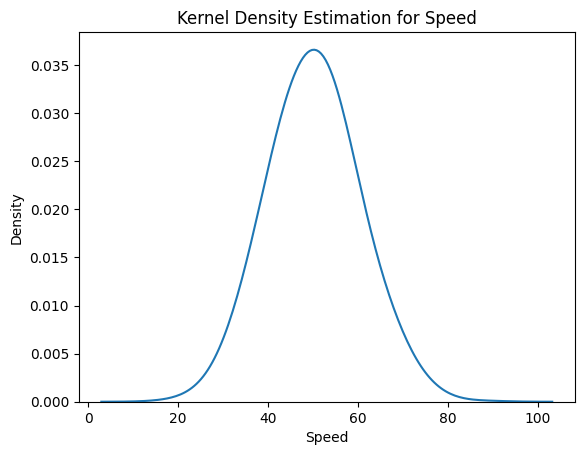

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 속도가 x인 데이터 생성 (이 부분을 실제 데이터에 맞게 수정)
np.random.seed(42)
speed_data = np.random.normal(loc=50, scale=10, size=1000)

# 속도에 대한 KDE 그리기
sns.kdeplot(speed_data, bw_method=0.5)  # bw_method는 대역폭(bandwidth)을 지정하는 매개변수로 조절 가능
plt.title('Kernel Density Estimation for Speed')
plt.xlabel('Speed')
plt.ylabel('Density')
plt.show()


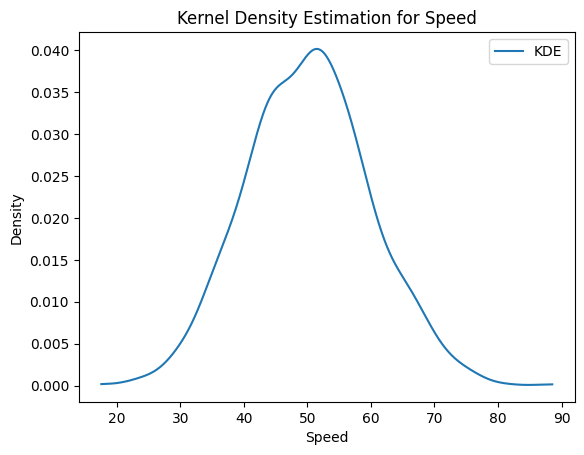

In [26]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

# 속도가 x인 데이터 생성 (이 부분을 실제 데이터에 맞게 수정)
np.random.seed(42)
speed_data = np.random.normal(loc=50, scale=10, size=1000)

# KDE를 위한 데이터 생성
x = np.linspace(min(speed_data), max(speed_data), 1000)
kde = gaussian_kde(speed_data)

# 속도에 대한 KDE 그리기
plt.plot(x, kde(x), label='KDE')
plt.title('Kernel Density Estimation for Speed')
plt.xlabel('Speed')
plt.ylabel('Density')
plt.legend()
plt.show()


In [3]:
df = pd.read_csv('J:/tmaplink2021/전처리/ETA/월별/TM_P1_202111_hy_ETA15_spdlim5030_hy.csv')

In [4]:
df.head()

,Unnamed: 0,obu_id,group_id,veh_type,seq,link_id,from_vlink_id,datetime,to_vlink_id,v_link_id,...,our_speed,length,speed,emd_code,road_rank,max_speed,link_type,road_type,time,spd_all
0,41,108220211115001649182S01,1,TM,2,478702556,47871416902,2021-11-15 00:17:00,47870255702,47870255601,...,91.8120,76.51,56.81,1102055,104,60,32768,0,00:15:00,50.0
1,42,108220211115001649182S01,1,TM,3,478702557,47870255601,2021-11-15 00:17:04,47870287001,47870255702,...,71.0220,118.37,62.42,1102060,104,60,32768,0,00:15:00,50.0
2,43,108220211115001649182S01,1,TM,4,478702870,47870255702,2021-11-15 00:17:11,47870256602,47870287001,...,72.3528,100.49,66.09,1102060,104,60,32768,0,00:15:00,50.0
3,44,108220211115001649182S01,1,TM,5,478702566,47870287001,2021-11-15 00:17:17,47870256502,47870256602,...,70.7832,98.31,53.24,1102060,104,60,32768,0,00:15:00,50.0
4,45,108220211115001649182S01,1,TM,6,478702565,47870256602,2021-11-15 00:17:23,47870751501,47870256502,...,49.7250,55.25,43.66,1102060,104,60,32768,0,00:15:00,50.0


In [26]:
df.our_speed

0           91.812000
1           71.022000
2           72.352800
3           70.783200
4           49.725000
              ...    
22510106    28.567543
22510107    31.894615
22510108    42.004800
22510109    39.024000
22510110    33.650597
Name: our_speed, Length: 22510111, dtype: float64

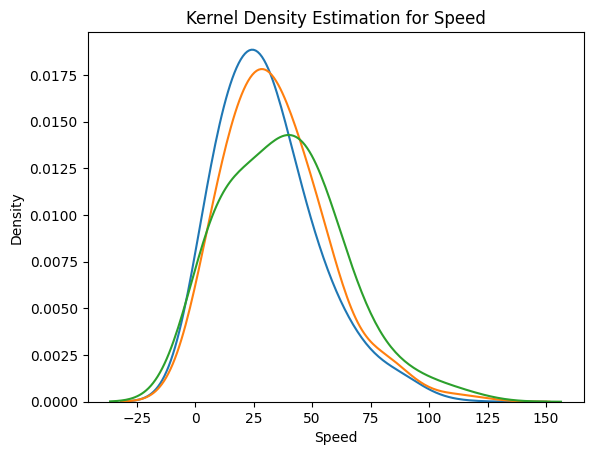

In [10]:
sns.kdeplot(df[df['spd_all']==30]['our_speed'], bw_method=0.5)  # bw_method는 대역폭(bandwidth)을 지정하는 매개변수로 조절 가능
sns.kdeplot(df[df['spd_all']==40]['our_speed'], bw_method=0.5)  # bw_method는 대역폭(bandwidth)을 지정하는 매개변수로 조절 가능
sns.kdeplot(df[df['spd_all']==50]['our_speed'], bw_method=0.5)  # bw_method는 대역폭(bandwidth)을 지정하는 매개변수로 조절 가능
plt.title('Kernel Density Estimation for Speed')
plt.xlabel('Speed')
plt.ylabel('Density')
plt.show()

In [11]:
df['in_datetime2'] = pd.to_datetime(df.in_datetime)
df['out_datetime2'] = pd.to_datetime(df.out_datetime)   

df['timedelta'] = (df.out_datetime2 - df.in_datetime2).dt.seconds
df.head()

,Unnamed: 0,obu_id,group_id,veh_type,seq,link_id,from_vlink_id,datetime,to_vlink_id,v_link_id,...,emd_code,road_rank,max_speed,link_type,road_type,time,spd_all,in_datetime2,out_datetime2,timedelta
0,41,108220211115001649182S01,1,TM,2,478702556,47871416902,2021-11-15 00:17:00,47870255702,47870255601,...,1102055,104,60,32768,0,00:15:00,50.0,2021-11-15 00:17:00,2021-11-15 00:17:03,3
1,42,108220211115001649182S01,1,TM,3,478702557,47870255601,2021-11-15 00:17:04,47870287001,47870255702,...,1102060,104,60,32768,0,00:15:00,50.0,2021-11-15 00:17:04,2021-11-15 00:17:10,6
2,43,108220211115001649182S01,1,TM,4,478702870,47870255702,2021-11-15 00:17:11,47870256602,47870287001,...,1102060,104,60,32768,0,00:15:00,50.0,2021-11-15 00:17:11,2021-11-15 00:17:16,5
3,44,108220211115001649182S01,1,TM,5,478702566,47870287001,2021-11-15 00:17:17,47870256502,47870256602,...,1102060,104,60,32768,0,00:15:00,50.0,2021-11-15 00:17:17,2021-11-15 00:17:22,5
4,45,108220211115001649182S01,1,TM,6,478702565,47870256602,2021-11-15 00:17:23,47870751501,47870256502,...,1102060,104,60,32768,0,00:15:00,50.0,2021-11-15 00:17:23,2021-11-15 00:17:27,4


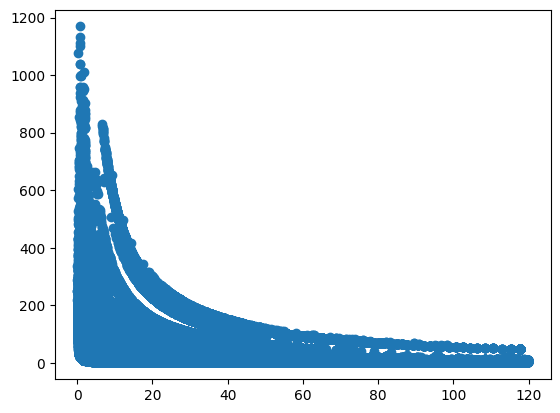

In [13]:
plt.scatter(df.our_speed, df.timedelta)

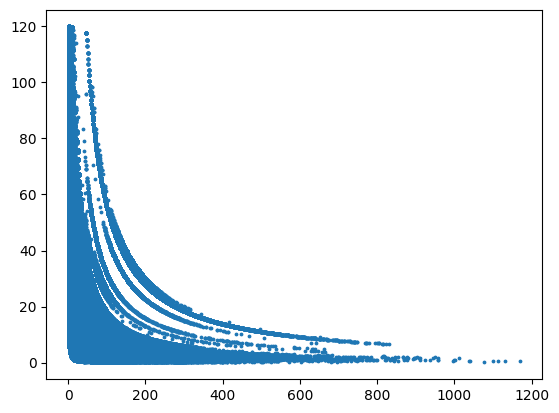

In [14]:
plt.scatter(df.timedelta, df.our_speed, s=3)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# 예제 데이터 생성 (이 부분을 실제 데이터에 맞게 수정)
# np.random.seed(42)
# data = pd.DataFrame({
#     'our_speed': np.random.normal(loc=50, scale=10, size=1000),
#     'time': np.random.choice(pd.date_range("00:00", "23:45", freq="15min").strftime('%H:%M'), size=1000),
#     'link_id': np.random.randint(1, 100, size=1000)
# })

# 'time'을 datetime 형식으로 변환
df['out_time'] = pd.to_datetime(df['time'], format='%H:%M')

# 'time'에 따라 데이터 분할하고 KDE 그리기
g = sns.FacetGrid(df, col="out_time", height=4, col_wrap=6, sharex=False)
g.map(sns.kdeplot, 'our_speed', bw_method=0.5)
g.set_axis_labels('Our Speed', 'Density')
plt.suptitle('Kernel Density Estimation for Our Speed by Time', y=1.02)
plt.show()


ValueError: unconverted data remains: :00

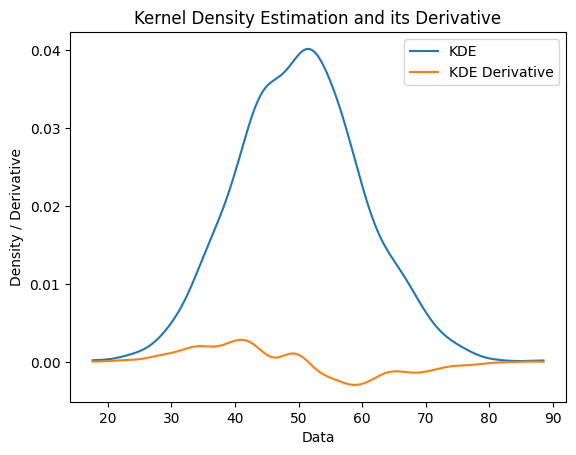

In [21]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# 데이터 생성 (이 부분을 실제 데이터에 맞게 수정)
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)

# KDE 계산
kde = gaussian_kde(data)

# KDE의 도함수 수치적 계산
x_values = np.linspace(min(data), max(data), 1000)
kde_derivative = np.gradient(kde(x_values), x_values)

# KDE 및 도함수 시각화
plt.plot(x_values, kde(x_values), label='KDE')
plt.plot(x_values, kde_derivative, label='KDE Derivative')
plt.title('Kernel Density Estimation and its Derivative')
plt.xlabel('Data')
plt.ylabel('Density / Derivative')
plt.legend()
plt.show()


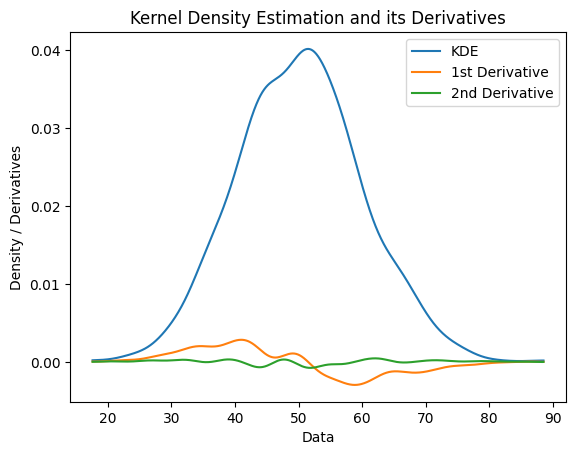

In [22]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# 데이터 생성 (이 부분을 실제 데이터에 맞게 수정)
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)

# KDE 계산
kde = gaussian_kde(data)

# KDE의 도함수 및 도함수의 도함수 수치적 계산
x_values = np.linspace(min(data), max(data), 1000)
kde_derivative_1 = np.gradient(kde(x_values), x_values)
kde_derivative_2 = np.gradient(kde_derivative_1, x_values)

# KDE, 도함수, 도함수의 도함수 시각화
plt.plot(x_values, kde(x_values), label='KDE')
plt.plot(x_values, kde_derivative_1, label='1st Derivative')
plt.plot(x_values, kde_derivative_2, label='2nd Derivative')
plt.title('Kernel Density Estimation and its Derivatives')
plt.xlabel('Data')
plt.ylabel('Density / Derivatives')
plt.legend()
plt.show()
